# Task 3: Signal Correlation Analysis

## Introduction

In this task, we analyze audio signals and explore cross-correlation to measure the similarity between two audio signals. We also examine how noise affects correlation results.

---

## Import Libraries

In [1]:
import os
import sys
from pathlib import Path
import numpy as np
import soundfile as sf
from matplotlib import pyplot as plt

# Ensure module imports work
sys.path.insert(0, str(Path().resolve().parents[1]))

from src.correlation_utils import cross_correlation
from src.signal_generation import add_noise
from src.fft_utils import compute_fft


---

## Load and Plot Original Audio Signal

We load the audio file (`chimes.wav`), convert it to mono if needed, and visualize the audio waveform.

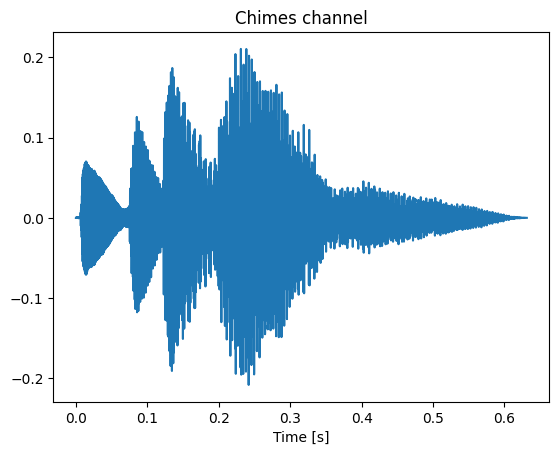

In [2]:
data, fs = sf.read("data/chimes.wav")
if data.ndim > 1:
    mono = data[:, 0]
else:
    mono = data
t = np.arange(len(mono)) / fs

# Plot the mono audio waveform
plt.figure()
plt.plot(t, mono)
plt.xlabel("Time [s]")
plt.title("Chimes channel")
plt.show()


---

## FFT Analysis of Audio Signal

We apply the Fast Fourier Transform (FFT) to the audio signal to analyze its frequency components.

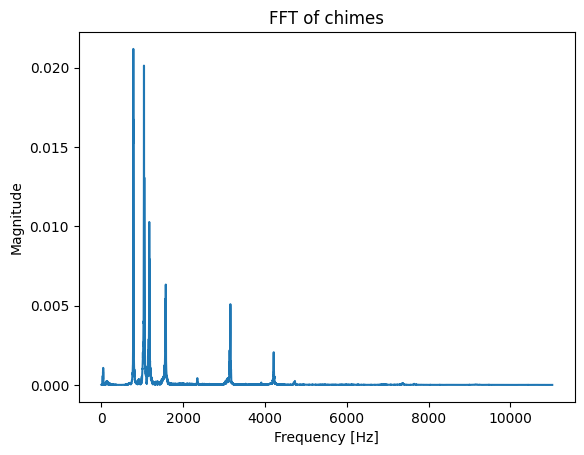

In [3]:
freqs, mag = compute_fft(mono, fs)

# Plot the FFT magnitude spectrum
plt.figure()
plt.plot(freqs, mag)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.title("FFT of chimes")
plt.show()


---

## Create Stereo Signal with Delay and Scaling
Create a stereo signal by delaying and scaling one channel relative to the other.

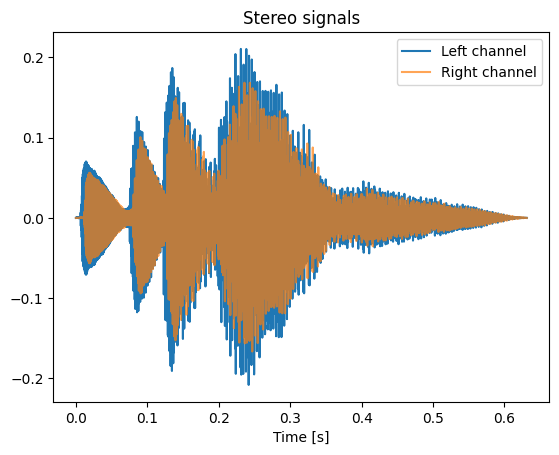

In [4]:
delay = 0.005  # Delay in seconds
scale = 0.8    # Scaling factor

delay_samples = int(delay * fs)
left = mono
right = np.roll(mono, delay_samples) * scale
stereo = np.stack([left, right], axis=1)

# Save stereo audio example
sf.write("results/audio/task3_3_stereo_example.wav", stereo, fs)

# Plot stereo signals
plt.figure()
plt.plot(t, left, label="Left channel")
plt.plot(t, right, label="Right channel", alpha=0.7)
plt.legend()
plt.xlabel("Time [s]")
plt.title("Stereo signals")
plt.show()


---

## Cross-Correlation Analysis
Use cross-correlation to measure similarity and identify the delay between the two audio signals.

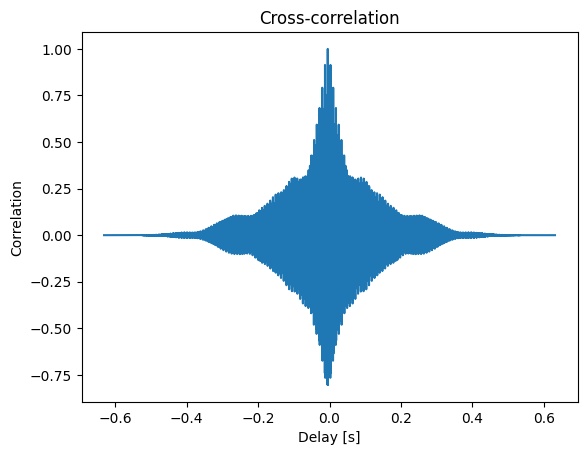

In [5]:
lags, corr = cross_correlation(left, right)

# Plot cross-correlation
plt.figure()
plt.plot(lags / fs, corr)
plt.xlabel("Delay [s]")
plt.ylabel("Correlation")
plt.title("Cross-correlation")
plt.show()


---

## Cross-Correlation with Noisy Signals
Examine how noise affects the correlation between two signals.

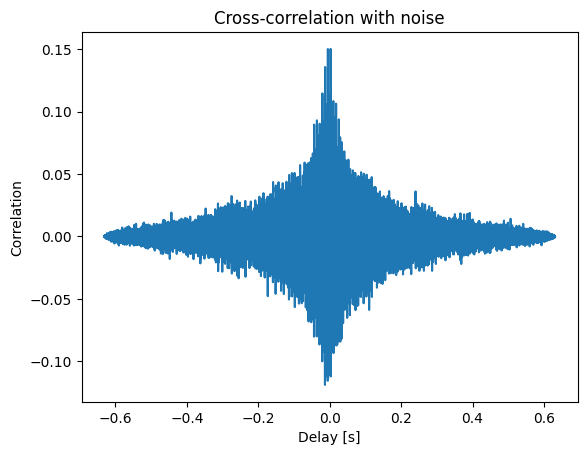

In [6]:
# Add noise to signals
left_n = add_noise(left, 0.1)
right_n = add_noise(right, 0.1)

# Compute cross-correlation of noisy signals
lags_n, corr_n = cross_correlation(left_n, right_n)

# Plot cross-correlation of noisy signals
plt.figure()
plt.plot(lags_n / fs, corr_n)
plt.xlabel("Delay [s]")
plt.ylabel("Correlation")
plt.title("Cross-correlation with noise")
plt.show()